In [390]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style

In [391]:
df = pd.read_csv("cubic_zirconia.csv")  

In [392]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [393]:
df=df.drop('Unnamed: 0',axis=1)

In [394]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


# 1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA). Perform Univariate and Bivariate Analysis.

In [395]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [396]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [397]:
df.duplicated().sum()

34

In [398]:
df.drop_duplicates(inplace=True)

In [399]:
df.duplicated().sum()

0

In [400]:
df.shape

(26933, 10)

In [401]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [402]:
df.describe()

,carat,depth,table,x,y,z,price
count,26933.000000,26236.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000
mean,0.798010,61.745285,57.455950,5.729346,5.733102,3.537769,3937.526120
std,0.477237,1.412243,2.232156,1.127367,1.165037,0.719964,4022.551862
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5356.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [403]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ')
    
    print("Skew of " + column)
    print(df[column].skew(),end=' ')

    print("----------------------------------------------------------------------------")
    

    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df[column], kde=True, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column])
    plt.show()

In [404]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

7

Description of carat
----------------------------------------------------------------------------
count    26933.000000
mean         0.798010
std          0.477237
min          0.200000
25%          0.400000
50%          0.700000
75%          1.050000
max          4.500000
Name: carat, dtype: float64 Skew of carat
1.114789102547177 ----------------------------------------------------------------------------
Distribution of carat
----------------------------------------------------------------------------


C:\Users\Kinshuk\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


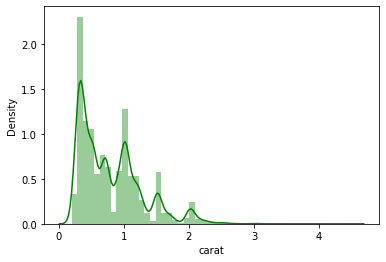

BoxPlot of carat
----------------------------------------------------------------------------


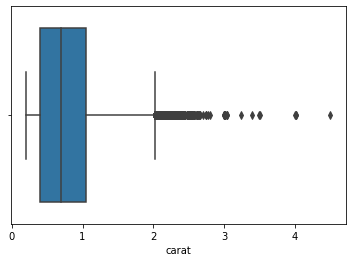

Description of depth
----------------------------------------------------------------------------
count    26236.000000
mean        61.745285
std          1.412243
min         50.800000
25%         61.000000
50%         61.800000
75%         62.500000
max         73.600000
Name: depth, dtype: float64 Skew of depth
-0.026085960544075602 ----------------------------------------------------------------------------
Distribution of depth
----------------------------------------------------------------------------


C:\Users\Kinshuk\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


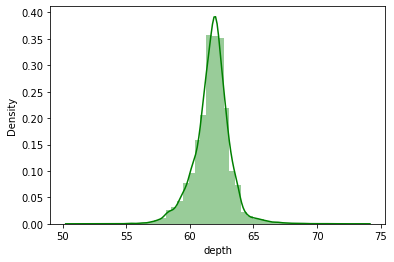

BoxPlot of depth
----------------------------------------------------------------------------


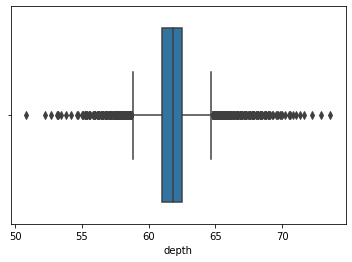

Description of table
----------------------------------------------------------------------------
count    26933.000000
mean        57.455950
std          2.232156
min         49.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         79.000000
Name: table, dtype: float64 Skew of table
0.7658050724889769 ----------------------------------------------------------------------------
Distribution of table
----------------------------------------------------------------------------


C:\Users\Kinshuk\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


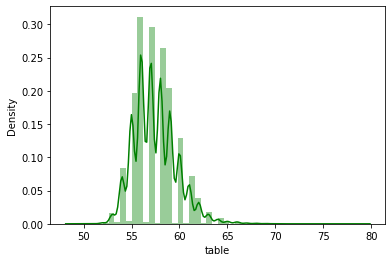

BoxPlot of table
----------------------------------------------------------------------------


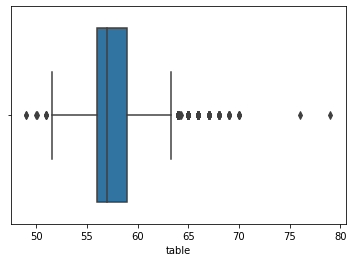

Description of x
----------------------------------------------------------------------------
count    26933.000000
mean         5.729346
std          1.127367
min          0.000000
25%          4.710000
50%          5.690000
75%          6.550000
max         10.230000
Name: x, dtype: float64 Skew of x
0.39228983097563763 ----------------------------------------------------------------------------
Distribution of x
----------------------------------------------------------------------------


C:\Users\Kinshuk\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


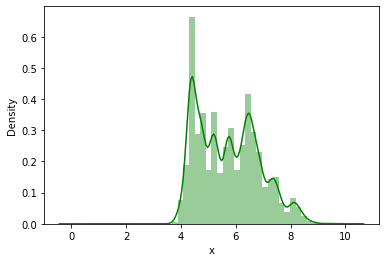

BoxPlot of x
----------------------------------------------------------------------------


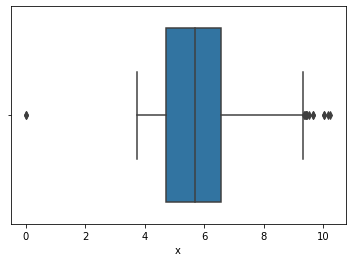

Description of y
----------------------------------------------------------------------------
count    26933.000000
mean         5.733102
std          1.165037
min          0.000000
25%          4.710000
50%          5.700000
75%          6.540000
max         58.900000
Name: y, dtype: float64 Skew of y
3.8677640870625782 ----------------------------------------------------------------------------
Distribution of y
----------------------------------------------------------------------------


C:\Users\Kinshuk\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


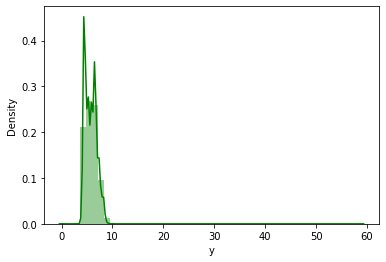

BoxPlot of y
----------------------------------------------------------------------------


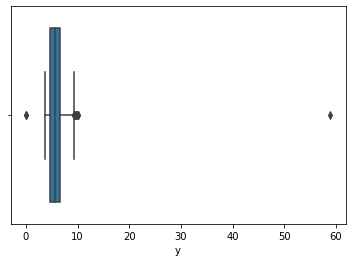

Description of z
----------------------------------------------------------------------------
count    26933.000000
mean         3.537769
std          0.719964
min          0.000000
25%          2.900000
50%          3.520000
75%          4.040000
max         31.800000
Name: z, dtype: float64 Skew of z
2.5806646675426226 ----------------------------------------------------------------------------
Distribution of z
----------------------------------------------------------------------------


C:\Users\Kinshuk\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


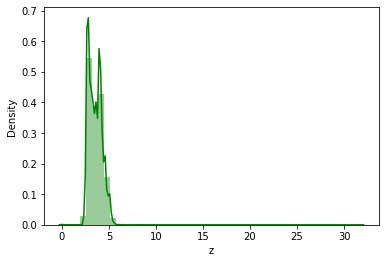

BoxPlot of z
----------------------------------------------------------------------------


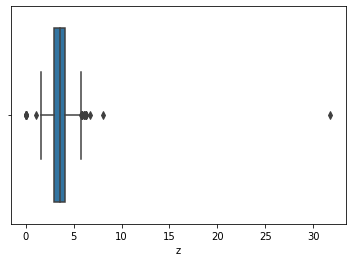

Description of price
----------------------------------------------------------------------------
count    26933.000000
mean      3937.526120
std       4022.551862
min        326.000000
25%        945.000000
50%       2375.000000
75%       5356.000000
max      18818.000000
Name: price, dtype: float64 Skew of price
1.6191155261542616 ----------------------------------------------------------------------------
Distribution of price
----------------------------------------------------------------------------


C:\Users\Kinshuk\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


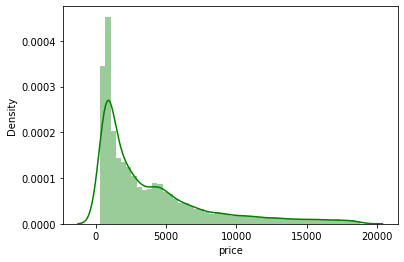

BoxPlot of price
----------------------------------------------------------------------------


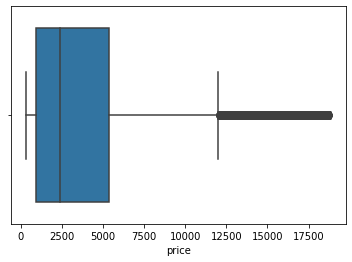

In [405]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

In [406]:
def univariateAnalysis_cat(column,nbins):
    
    
    plt.figure()
    print("Count Plot of " + column)
    print("----------------------------------------------------------------------------")
    sns.countplot(x=df[column], data=df);
    plt.show()
    
   



In [407]:
df_cat = df.select_dtypes(include = ['object'])
lstcatcolumns = list(df_cat.columns.values)
len(lstcatcolumns)

3

Count Plot of cut
----------------------------------------------------------------------------


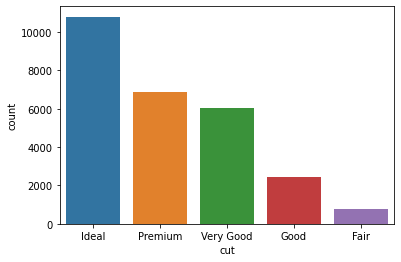

Count Plot of color
----------------------------------------------------------------------------


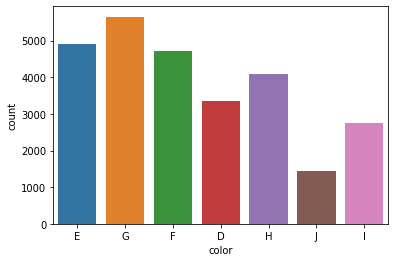

Count Plot of clarity
----------------------------------------------------------------------------


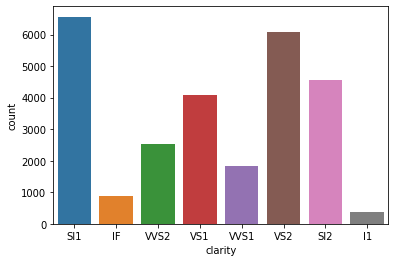

In [408]:
for x in lstcatcolumns:
    univariateAnalysis_cat(x,20)

In [409]:
def bivariateAnalysis_cat(column,nbins):
    
    
    plt.figure()
    print("Bar Plot of " + column)
    print("----------------------------------------------------------------------------")
    sns.barplot(x=df[column],y=df['price'],ci=False);
    plt.show()
    
   



In [410]:
df_bi = df[['clarity','color','cut']]
lstcatcolumns = list(df_bi.columns.values)
len(lstcatcolumns)


3

Bar Plot of clarity
----------------------------------------------------------------------------


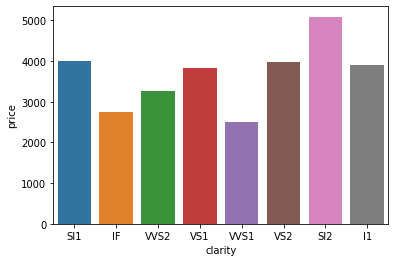

Bar Plot of color
----------------------------------------------------------------------------


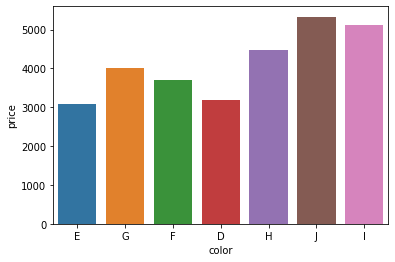

Bar Plot of cut
----------------------------------------------------------------------------


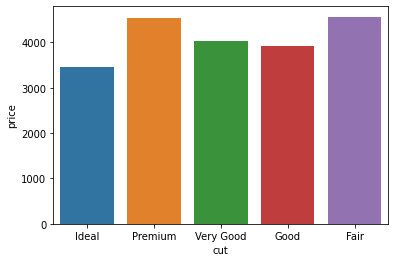

In [411]:
for x in lstcatcolumns:
    bivariateAnalysis_cat(x,20)

In [412]:
df.loc[((df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0))]


,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


In [413]:
for column in df.columns:
    if df[column].dtype != 'object':
        median = df[column].median()
        df[column] = df[column].fillna(median)    
        
df.isnull().sum()     

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [414]:
# Complete the function to calculate lower_range and upper_range
def treat_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [415]:
for feature in df[['carat', 'depth', 'table', 'x', 'y','z','price']]: 
    lr,ur=treat_outlier(df[feature])
    df[feature]=np.where(df[feature]>ur,ur,df[feature])
    df[feature]=np.where(df[feature]<lr,lr,df[feature])

<AxesSubplot:>

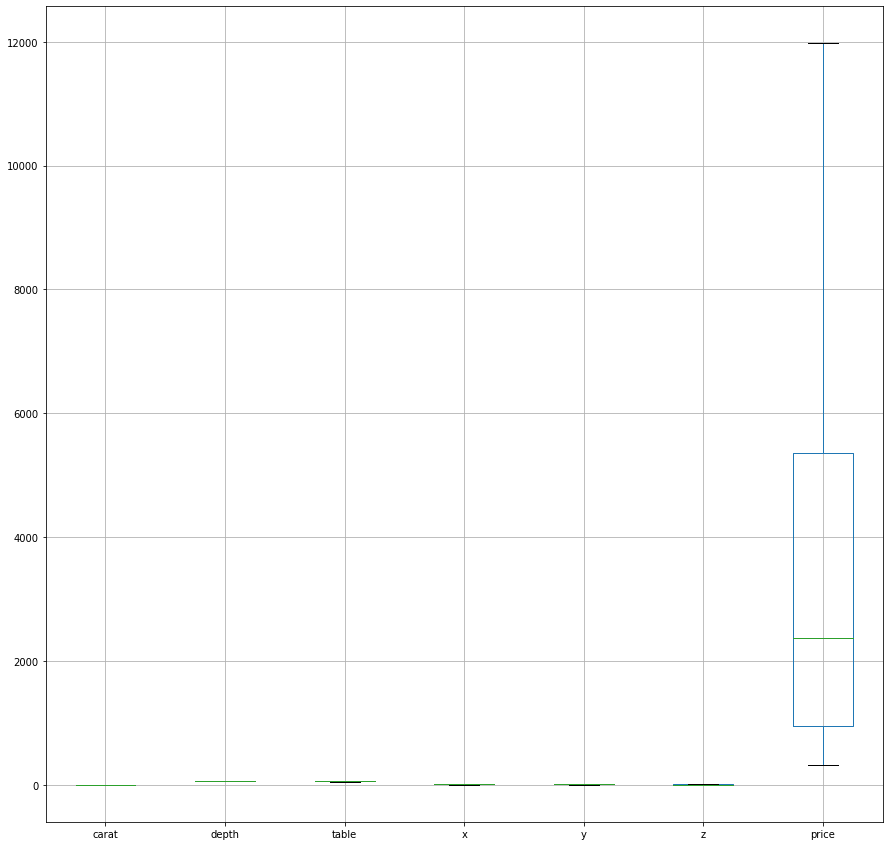

In [416]:
plt.figure(figsize=(15,15))
df[['carat', 'depth', 'table', 'x', 'y','z','price']].boxplot()

C:\Users\Kinshuk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Kinshuk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Kinshuk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Kinshuk\anaconda

<AxesSubplot:xlabel='price'>

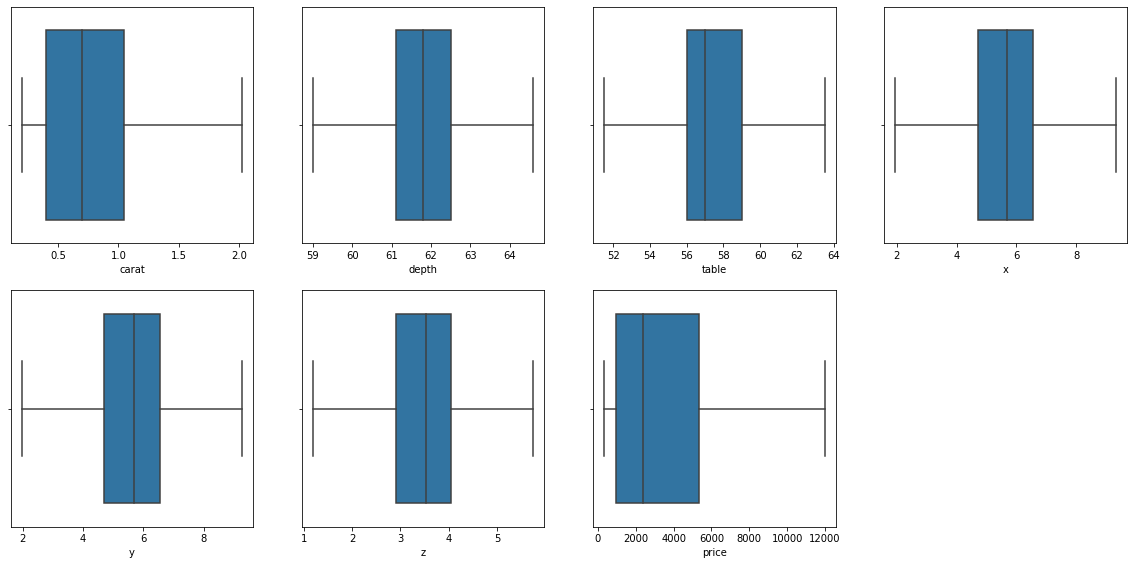

In [417]:
#Boxplots after outlier treatment
plt.figure(figsize=(20,20))
ax1=plt.subplot2grid((4,4),(0,0))
sns.boxplot(df['carat'])
ax2=plt.subplot2grid((4,4),(0,1))
sns.boxplot(df['depth'])
ax3=plt.subplot2grid((4,4),(0,2))
sns.boxplot(df['table'])
ax4=plt.subplot2grid((4,4),(0,3))
sns.boxplot(df['x'])
ax5=plt.subplot2grid((4,4),(1,0))
sns.boxplot(df['y'])
ax6=plt.subplot2grid((4,4),(1,1))
sns.boxplot(df['z'])
ax7=plt.subplot2grid((4,4),(1,2))
sns.boxplot(df['price'])

In [418]:
corr = df_num.corr(method='pearson')

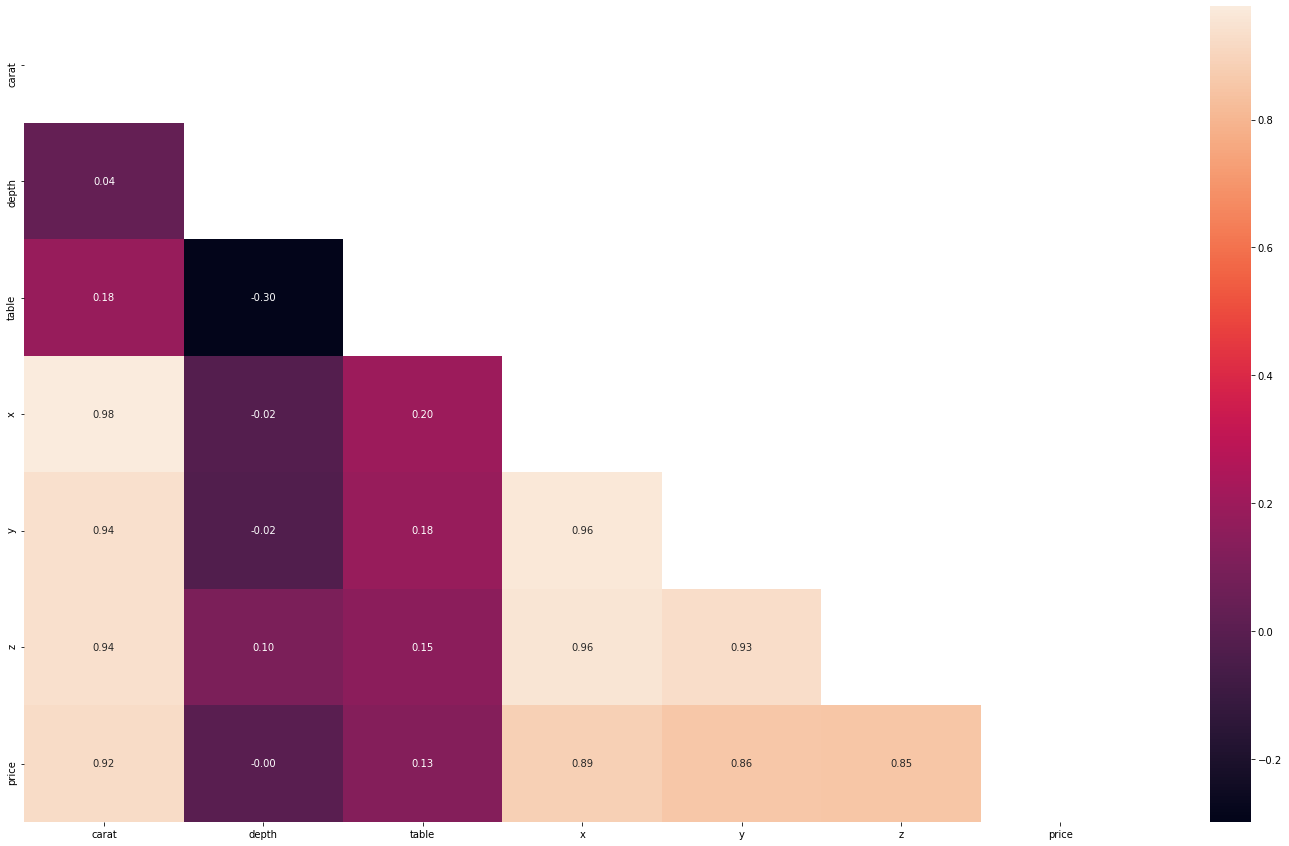

In [419]:
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(25, 15))
sns.heatmap(df_num.corr(), annot=True,fmt='.2f',mask=mask)
plt.show()

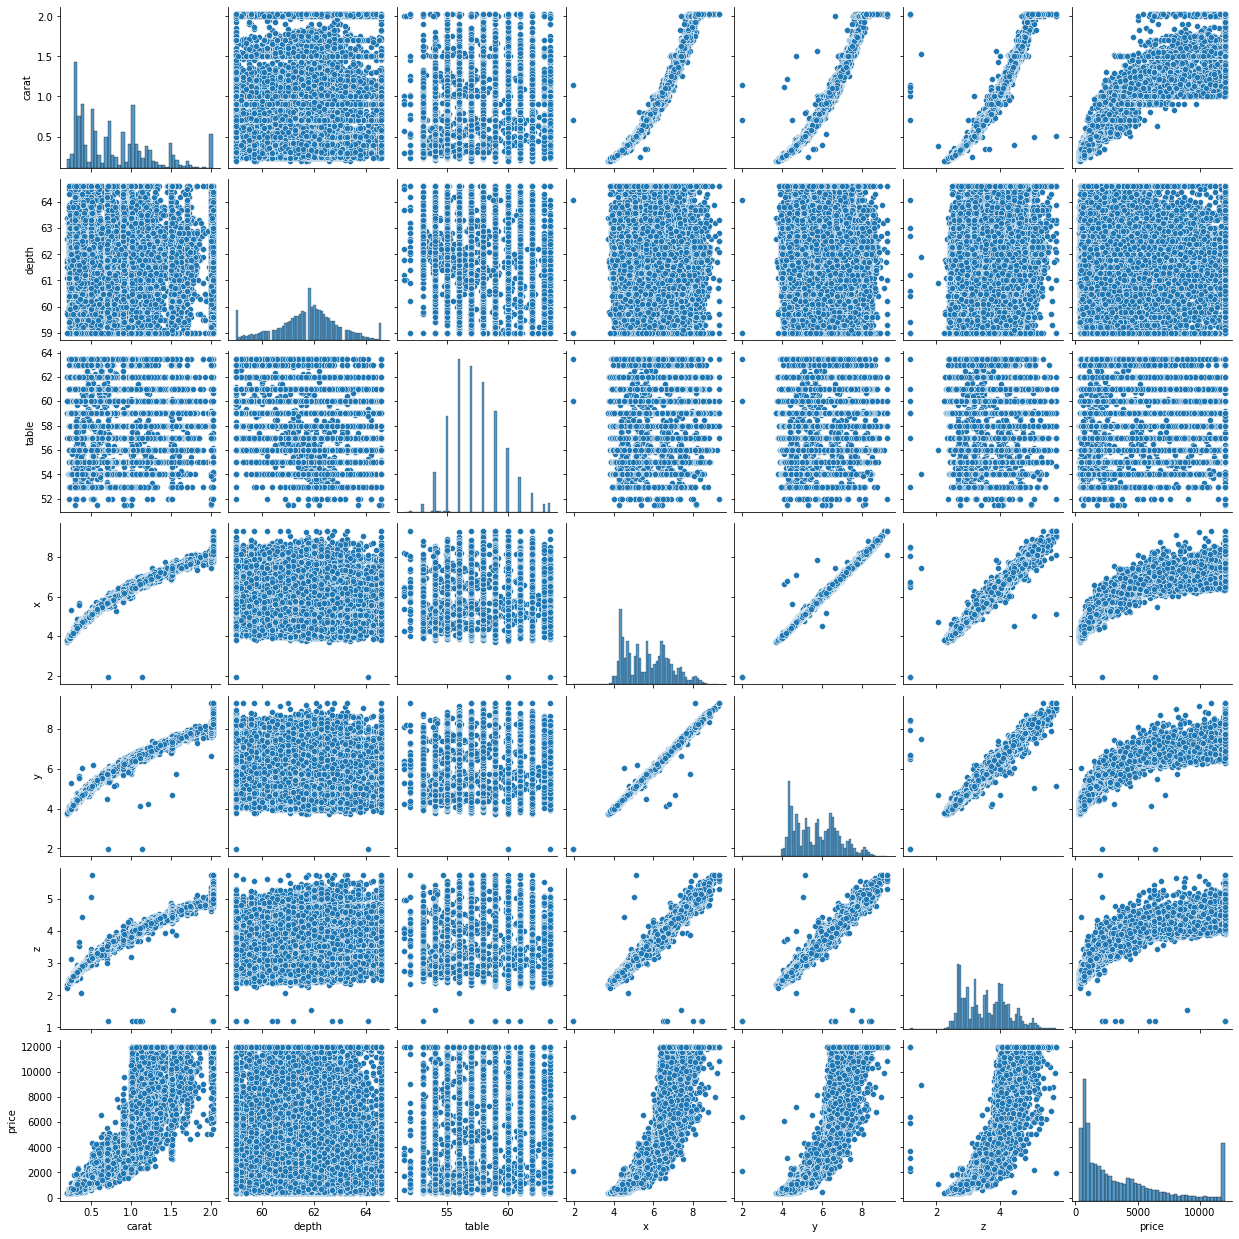

In [420]:
sns.pairplot(df)

In [421]:
df.shape

(26933, 10)

# 1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

In [422]:
df = pd.get_dummies(df, columns=['cut','color','clarity'],drop_first=True)

In [423]:
df.head()

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.30,62.1,58.0,4.27,4.29,2.66,499.0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0.33,60.8,58.0,4.42,4.46,2.70,984.0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0.90,62.2,60.0,6.04,6.12,3.78,6289.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.42,61.6,56.0,4.82,4.80,2.96,1082.0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0.31,60.4,59.0,4.35,4.43,2.65,779.0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [424]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from scipy.stats import zscore

In [425]:
X=df.drop('price',axis=1)
Y=df[['price']]


In [426]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [427]:
print(X_train.shape)
print(X_test.shape)


(18853, 23)
(8080, 23)


In [428]:
X_train_scaled=X_train.apply(zscore)
X_test_scaled=X_test.apply(zscore)
Y_train_scaled=Y_train.apply(zscore)
Y_test_scaled=Y_test.apply(zscore)

In [429]:
lr=LinearRegression()
regression_model=lr.fit(X_train_scaled ,Y_train_scaled)

In [430]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train_scaled.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.2117340055479433
The coefficient for depth is -0.005217757324150522
The coefficient for table is -0.011544277259256237
The coefficient for x is -0.3853666580911638
The coefficient for y is 0.2693351811203752
The coefficient for z is -0.032888832077765356
The coefficient for cut_Good is 0.03958741581860086
The coefficient for cut_Ideal is 0.10104649875722485
The coefficient for cut_Premium is 0.08520733469572135
The coefficient for cut_Very Good is 0.0730939557502272
The coefficient for color_E is -0.020383670945041756
The coefficient for color_F is -0.027941672405845757
The coefficient for color_G is -0.05068698186210166
The coefficient for color_H is -0.08864220073163137
The coefficient for color_I is -0.11609415713251378
The coefficient for color_J is -0.12433002551329815
The coefficient for clarity_IF is 0.20491589766149984
The coefficient for clarity_SI1 is 0.31208062172153944
The coefficient for clarity_SI2 is 0.18277856243967902
The coefficient for 

In [431]:
pred_train=regression_model.predict(X_train_scaled)
pred_test=regression_model.predict(X_test_scaled)

In [432]:
from sklearn.metrics import r2_score
r2_score(Y_test_scaled,pred_test)

0.9416787700746835

In [433]:
r2_score(Y_train_scaled,pred_train)

0.9402044588687953

In [434]:
import math
from sklearn.metrics import mean_squared_error

In [435]:
math.sqrt(mean_squared_error(Y_test_scaled,pred_test))

0.24149788803489886

In [436]:
math.sqrt(mean_squared_error(Y_train_scaled,pred_train))

0.24453126820757445

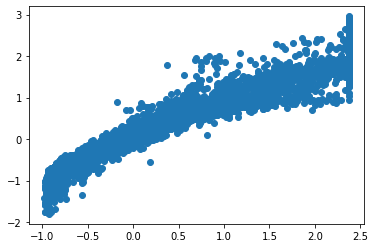

In [437]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
#plt.rcParams['figure.dpi'] = 500



plt.scatter(Y_test_scaled['price'], pred_test)



In [438]:
data_train=pd.concat([X_train_scaled,Y_train_scaled],axis=1)
data_test=pd.concat([X_test_scaled,Y_test_scaled],axis=1)


In [439]:
data_train
data_train=data_train.rename(columns ={'cut_Very Good':'cut_Very_Good'}, inplace = False)
data_train

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very_Good,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
22114,-0.983742,0.537882,1.194109,-1.175731,-1.158718,-1.119070,-0.312570,-0.817201,-0.589826,1.857595,...,-0.338778,-0.235920,-0.183323,-0.567366,-0.453334,-0.423665,1.861564,-0.273377,-0.323691,-0.923160
2275,-1.070676,-0.453630,-1.127570,-1.229200,-1.275376,-1.277503,-0.312570,1.223690,-0.589826,-0.538330,...,-0.338778,-0.235920,-0.183323,-0.567366,-0.453334,-0.423665,1.861564,-0.273377,-0.323691,-0.834576
19183,-0.636006,0.620508,-0.198899,-0.569745,-0.611323,-0.528546,-0.312570,1.223690,-0.589826,-0.538330,...,-0.338778,-0.235920,-0.183323,1.762530,-0.453334,-0.423665,-0.537183,-0.273377,-0.323691,-0.720311
5030,0.668006,1.281516,-0.663234,0.713519,0.761649,0.882949,3.199281,-0.817201,-0.589826,-0.538330,...,-0.338778,-0.235920,-0.183323,-0.567366,2.205878,-0.423665,-0.537183,-0.273377,-0.323691,0.094835
25414,0.494138,-0.536256,2.122780,0.722431,0.680886,0.638098,-0.312570,-0.817201,1.695416,-0.538330,...,-0.338778,-0.235920,-0.183323,-0.567366,2.205878,-0.423665,-0.537183,-0.273377,-0.323691,0.092527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10962,-1.092410,-0.371004,-1.127570,-1.318316,-1.302297,-1.335115,-0.312570,1.223690,-0.589826,-0.538330,...,-0.338778,-0.235920,5.454842,-0.567366,-0.453334,-0.423665,-0.537183,-0.273377,-0.323691,-0.883918
17304,-0.201335,-0.123126,-0.198899,-0.008317,0.034781,0.004365,-0.312570,1.223690,-0.589826,-0.538330,...,-0.338778,4.238726,-0.183323,-0.567366,-0.453334,2.360356,-0.537183,-0.273377,-0.323691,-0.599987
5193,0.928808,-0.949386,1.658445,1.078893,1.030860,0.940561,-0.312570,-0.817201,1.695416,-0.538330,...,2.951785,-0.235920,-0.183323,-0.567366,-0.453334,2.360356,-0.537183,-0.273377,-0.323691,0.755320
12179,0.515871,2.190402,1.658445,0.535288,0.465518,0.738919,-0.312570,-0.817201,-0.589826,-0.538330,...,-0.338778,-0.235920,-0.183323,1.762530,-0.453334,-0.423665,-0.537183,-0.273377,-0.323691,0.319902


In [440]:
formula='price ~  carat + depth + table + x + y + z + cut_Good + cut_Ideal + cut_Premium + cut_Very_Good + color_E + color_F + color_G + color_H + color_I + color_J + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2'

In [441]:
lr1=smf.ols(formula=formula,data=data_train).fit()
lr1.params

Intercept       -1.038666e-16
carat            1.211734e+00
depth           -5.217757e-03
table           -1.154428e-02
x               -3.853667e-01
y                2.693352e-01
z               -3.288883e-02
cut_Good         3.958742e-02
cut_Ideal        1.010465e-01
cut_Premium      8.520733e-02
cut_Very_Good    7.309396e-02
color_E         -2.038367e-02
color_F         -2.794167e-02
color_G         -5.068698e-02
color_H         -8.864220e-02
color_I         -1.160942e-01
color_J         -1.243300e-01
clarity_IF       2.049159e-01
clarity_SI1      3.120806e-01
clarity_SI2      1.827786e-01
clarity_VS1      3.464385e-01
clarity_VS2      3.656764e-01
clarity_VVS1     2.768755e-01
clarity_VVS2     3.176910e-01
dtype: float64

In [442]:
(lr1.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                 1.287e+04
Date:                Sun, 31 Oct 2021   Prob (F-statistic):               0.00
Time:                        18:35:46   Log-Likelihood:                -198.45
No. Observations:               18853   AIC:                             444.9
Df Residuals:                   18829   BIC:                             633.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.039e-16      0.002  -5.83e-14      1.000      -0.003       0.003
carat             1.2117      0.010    119.777      0.000       1.192       1.232
depth            -0.0052      0.003     -1.755      0.079      -0.011       0.001
table            -0.0115      0.002     -4.834      0.000      -0.016      -0.007
x                -0.3854      0.039     -9.877      0.000      -0.462      -0.309
y                 0.2693      0.039      6.944      0.000       0.193       0.345
z                -0.0329      0.018     -1.828      0.068      -0.068       0.002
cut_Good          0.0396      0.004     10.895      0.000       0.032       0.047
cut_Ideal         0.1010      0.006     16.594      0.000       0.089       0.113
cut_Premium       0.0852      0.005     16.309      0.000       0.075       0.095
cut_Very_Good     0.0731      0.005     14.335      0.000       0.063       0.083
color_E          -0.0204      0.003     -7.996      0.000      -0.025      -0.015
color_F          -0.0279      0.003    -11.060      0.000      -0.033      -0.023
color_G          -0.0507      0.003    -19.060      0.000      -0.056      -0.045
color_H          -0.0886      0.002    -35.505      0.000      -0.094      -0.084
color_I          -0.1161      0.002    -49.389      0.000      -0.121      -0.111
color_J          -0.1243      0.002    -58.345      0.000      -0.129      -0.120
clarity_IF        0.2049      0.003     60.497      0.000       0.198       0.212
clarity_SI1       0.3121      0.007     44.500      0.000       0.298       0.326
clarity_SI2       0.1828      0.006     29.599      0.000       0.171       0.195
clarity_VS1       0.3464      0.006     57.879      0.000       0.335       0.358
clarity_VS2       0.3657      0.007     53.374      0.000       0.352       0.379
clarity_VVS1      0.2769      0.004     61.843      0.000       0.268       0.286
clarity_VVS2      0.3177      0.005     63.249      0.000       0.308       0.328
==============================================================================
Omnibus:                     4751.297   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17533.672
Skew:                           1.230   Prob(JB):                         0.00
Kurtosis:                       7.034   Cond. No.                         62.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [443]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = data_train.columns
vif['VIF'] = [variance_inflation_factor(data_train.values, i) for i in range(data_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,x,481.87
4,y,474.98
5,z,101.93
0,carat,56.78
17,clarity_SI1,17.12
20,clarity_VS2,17.02
23,price,16.72
19,clarity_VS1,13.29
18,clarity_SI2,12.57
7,cut_Ideal,11.85


In [444]:
data_train1=data_train.drop(['x'],axis=1)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = data_train1.columns
vif['VIF'] = [variance_inflation_factor(data_train1.values, i) for i in range(data_train1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,y,119.24
4,z,97.80
0,carat,55.10
16,clarity_SI1,17.11
19,clarity_VS2,17.01
22,price,16.64
18,clarity_VS1,13.28
17,clarity_SI2,12.56
6,cut_Ideal,11.66
21,clarity_VVS2,9.63


In [445]:
formula1='price ~  carat + depth + table + y + z + cut_Good + cut_Ideal + cut_Premium + cut_Very_Good + color_E + color_F + color_G + color_H + color_I + color_J + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2'
lr2=smf.ols(formula=formula1,data=data_train1).fit()
lr2.params
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                 1.338e+04
Date:                Sun, 31 Oct 2021   Prob (F-statistic):               0.00
Time:                        18:40:33   Log-Likelihood:                -247.17
No. Observations:               18853   AIC:                             540.3
Df Residuals:                   18830   BIC:                             720.8
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.776e-17      0.002  -1.55e-14

In [156]:
data_train2=data_train1.drop('y',axis=1)
vif = pd.DataFrame()
vif['Features'] = data_train2.columns
vif['VIF'] = [variance_inflation_factor(data_train2.values, i) for i in range(data_train2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carat,48.51
3,z,25.72
15,clarity_SI1,17.09
18,clarity_VS2,17.00
21,price,16.63
17,clarity_VS1,13.28
16,clarity_SI2,12.55
5,cut_Ideal,11.53
20,clarity_VVS2,9.62
6,cut_Premium,8.66


In [446]:
formula2='price ~  carat + depth + table + z + cut_Good + cut_Ideal + cut_Premium + cut_Very_Good + color_E + color_F + color_G + color_H + color_I + color_J + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2'
lr3=smf.ols(formula=formula2,data=data_train2).fit()
lr3.params
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                 1.401e+04
Date:                Sun, 31 Oct 2021   Prob (F-statistic):               0.00
Time:                        18:40:36   Log-Likelihood:                -252.24
No. Observations:               18853   AIC:                             548.5
Df Residuals:                   18831   BIC:                             721.1
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.852e-17      0.002   3.83e-14

In [447]:
data_train3=data_train2.drop('depth',axis=1)
vif = pd.DataFrame()
vif['Features'] = data_train3.columns
vif['VIF'] = [variance_inflation_factor(data_train3.values, i) for i in range(data_train3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carat,46.89
2,z,24.07
14,clarity_SI1,17.08
17,clarity_VS2,16.99
20,price,16.63
16,clarity_VS1,13.26
15,clarity_SI2,12.54
4,cut_Ideal,10.53
19,clarity_VVS2,9.62
5,cut_Premium,8.05


In [448]:
formula3='price ~  carat  + table + z + cut_Good + cut_Ideal + cut_Premium + cut_Very_Good + color_E + color_F + color_G + color_H + color_I + color_J + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2'
lr4=smf.ols(formula=formula3,data=data_train3).fit()
lr4.params
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                 1.471e+04
Date:                Sun, 31 Oct 2021   Prob (F-statistic):               0.00
Time:                        18:44:48   Log-Likelihood:                -254.21
No. Observations:               18853   AIC:                             550.4
Df Residuals:                   18832   BIC:                             715.2
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.475e-17      0.002  -8.25e-15

In [449]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot
 

def select_features(X_train_scaled, Y_train_scaled, X_test_scaled):
    fs = SelectKBest(score_func=f_regression, k='all')
    fs.fit(X_train_scaled, Y_train_scaled)
    X_train_fs = fs.transform(X_train_scaled)
    X_test_fs = fs.transform(X_test_scaled)
    return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_scaled, Y_train_scaled, X_test_scaled)
# what are scores for the features
f_scores=[]
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
    f_scores.append(fs.scores_[i])
    

Feature 0: 133116.037920
Feature 1: 0.180691
Feature 2: 364.048087
Feature 3: 93327.022281
Feature 4: 95233.996218
Feature 5: 85218.596116
Feature 6: 0.699024
Feature 7: 222.241702
Feature 8: 149.839338
Feature 9: 6.467097
Feature 10: 190.047150
Feature 11: 11.489039
Feature 12: 0.996654
Feature 13: 71.482182
Feature 14: 181.017478
Feature 15: 126.504271
Feature 16: 54.429731
Feature 17: 1.732296
Feature 18: 321.105861
Feature 19: 0.530707
Feature 20: 0.725149
Feature 21: 202.508360
Feature 22: 35.588376


C:\Users\Kinshuk\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [451]:
top5=pd.DataFrame({'Columns':X_train.columns,'Feature_importance':f_scores})
top5=top5.sort_values(by='Feature_importance',ascending=False)
top5.head()

,Columns,Feature_importance
0,carat,133116.037920
4,y,95233.996218
3,x,93327.022281
5,z,85218.596116
2,table,364.048087


In [318]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [319]:
df2=pd.read_csv('Holiday_Package.csv')

In [320]:
df.head()

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.30,62.1,58.0,4.27,4.29,2.66,499.0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0.33,60.8,58.0,4.42,4.46,2.70,984.0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0.90,62.2,60.0,6.04,6.12,3.78,6289.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.42,61.6,56.0,4.82,4.80,2.96,1082.0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0.31,60.4,59.0,4.35,4.43,2.65,779.0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [321]:
df2=df2.drop('Unnamed: 0',axis=1)

In [322]:
df2.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [323]:
df2.describe(include='all')

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
count,872,872.000000,872.000000,872.000000,872.000000,872.000000,872
unique,2,NaN,NaN,NaN,NaN,NaN,2
top,no,NaN,NaN,NaN,NaN,NaN,no
freq,471,NaN,NaN,NaN,NaN,NaN,656
mean,NaN,47729.172018,39.955275,9.307339,0.311927,0.982798,NaN
std,NaN,23418.668531,10.551675,3.036259,0.612870,1.086786,NaN
min,NaN,1322.000000,20.000000,1.000000,0.000000,0.000000,NaN
25%,NaN,35324.000000,32.000000,8.000000,0.000000,0.000000,NaN
50%,NaN,41903.500000,39.000000,9.000000,0.000000,1.000000,NaN
75%,NaN,53469.500000,48.000000,12.000000,0.000000,2.000000,NaN


In [324]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [325]:
df2.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [326]:
df2.duplicated().sum()

0

In [327]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ')
    
    print("Skew of " + column)
    print(df[column].skew(),end=' ')

    print("----------------------------------------------------------------------------")
    

    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df[column], kde=True, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column])
    plt.show()

In [328]:
df_num = df2.select_dtypes(include = ['float64', 'int64'])

lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

5

C:\Users\Kinshuk\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Kinshuk\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Kinshuk\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

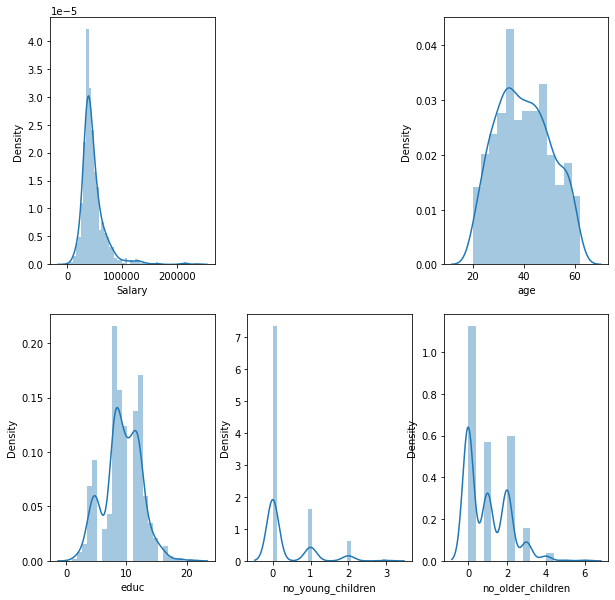

In [329]:
plt.figure(figsize=(10,10))
ax1=plt.subplot2grid((2,3),(0,0))
sns.distplot(df2['Salary'])
ax2=plt.subplot2grid((2,3),(0,2))
sns.distplot(df2['age'])
ax3=plt.subplot2grid((2,3),(1,0))
sns.distplot(df2['educ'])
ax4=plt.subplot2grid((2,3),(1,1))
sns.distplot(df2['no_young_children'])
ax5=plt.subplot2grid((2,3),(1,2))
sns.distplot(df2['no_older_children'])
plt.savefig('Dist_HOLIDAY.png',dpi=300)


In [330]:
skew1=[]
col=[]

for i in df2.columns:
    if(df2[i].dtype=='O'):
        pass
    else:
        col.append(i)
        z=df2[i].skew()
        skew1.append(z)
        
        
    

In [331]:
pd.DataFrame({'columns':col,'Skew':skew1})

,columns,Skew
0,Salary,3.103216
1,age,0.146412
2,educ,-0.045501
3,no_young_children,1.946515
4,no_older_children,0.953951


In [332]:
def univariateAnalysis_cat(column,nbins):
    
    
    plt.figure()
    print("Count Plot of " + column)
    print("----------------------------------------------------------------------------")
    sns.countplot(x=df[column], data=df);
    plt.show()
    
   



In [333]:
df_cat = df2.select_dtypes(include = ['object'])
lstcatcolumns = list(df_cat.columns.values)
len(lstcatcolumns)

2

C:\Users\Kinshuk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.
C:\Users\Kinshuk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='foreign', ylabel='count'>

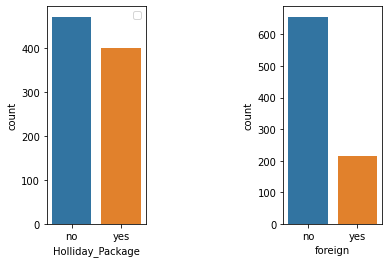

In [334]:
ax1=plt.subplot2grid((1,3),(0,0))
sns.countplot(df2['Holliday_Package'])
plt.legend()
ax2=plt.subplot2grid((1,3),(0,2))
sns.countplot(df2['foreign'])


In [335]:
df2['foreign'].value_counts(normalize="True")

no     0.752294
yes    0.247706
Name: foreign, dtype: float64

In [336]:
df2['Holliday_Package'].value_counts(normalize="True")

no     0.540138
yes    0.459862
Name: Holliday_Package, dtype: float64

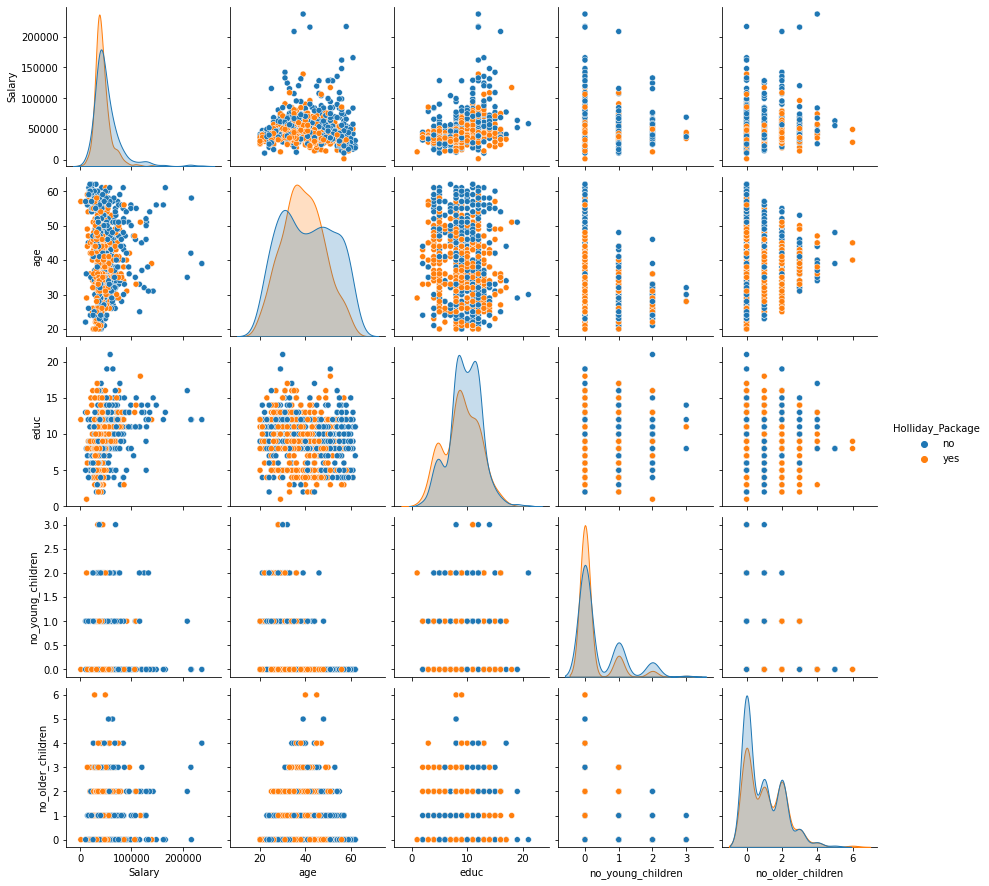

In [338]:
sns.pairplot(df2 , hue='Holliday_Package' , diag_kind = 'kde')

C:\Users\Kinshuk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Kinshuk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Kinshuk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Kinshuk\anaconda

<AxesSubplot:xlabel='no_older_children'>

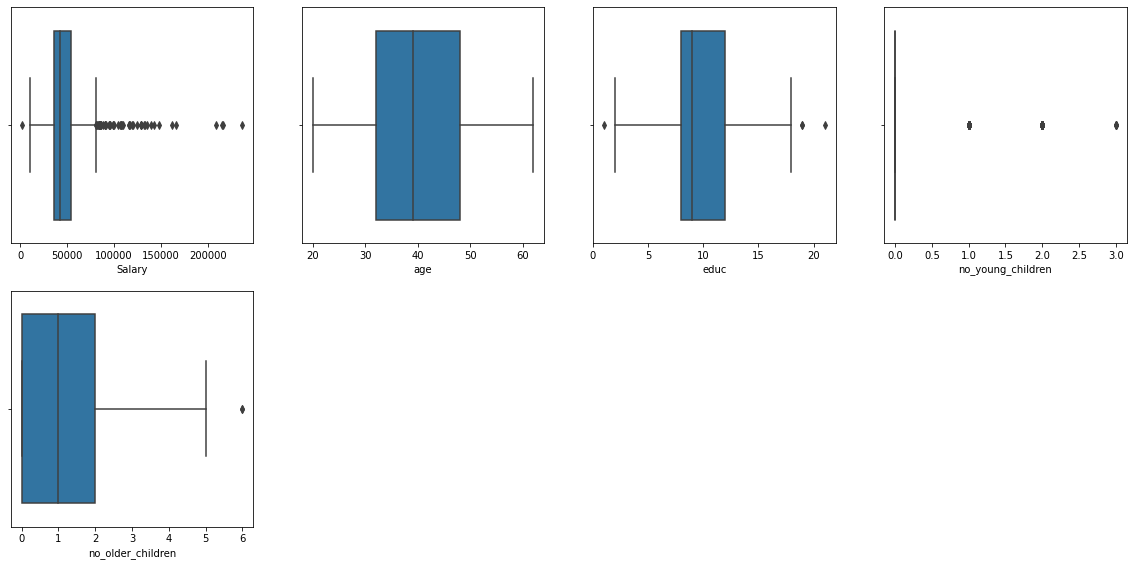

In [339]:
#Boxplots after outlier treatment
plt.figure(figsize=(20,20))
ax1=plt.subplot2grid((4,4),(0,0))
sns.boxplot(df2['Salary'])
ax2=plt.subplot2grid((4,4),(0,1))
sns.boxplot(df2['age'])
ax3=plt.subplot2grid((4,4),(0,2))
sns.boxplot(df2['educ'])
ax4=plt.subplot2grid((4,4),(0,3))
sns.boxplot(df2['no_young_children'])
ax5=plt.subplot2grid((4,4),(1,0))
sns.boxplot(df2['no_older_children'])


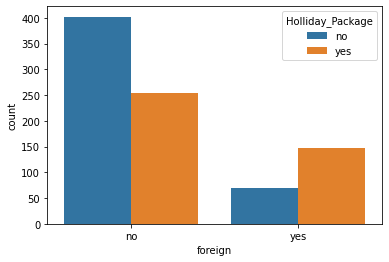

In [340]:

    sns.countplot(x=df2['foreign'], data=df2,hue="Holliday_Package");
    plt.show()
    
   



In [341]:
corr = df2.corr(method='pearson')

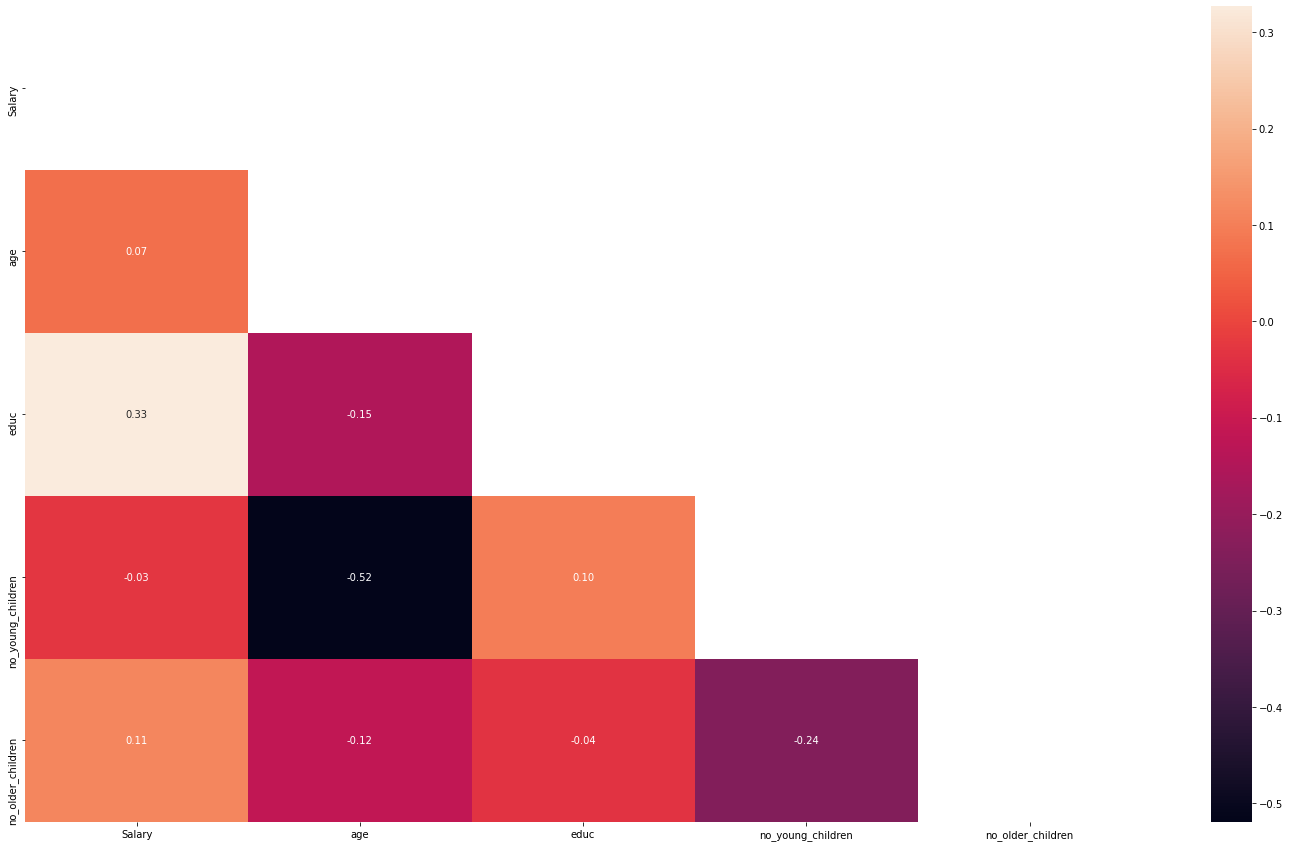

In [342]:
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(25, 15))
sns.heatmap(df_num.corr(), annot=True,fmt='.2f',mask=mask)
plt.show()

In [343]:
for i in df2.columns:
    if(df2[i].dtypes=='O'):
        df2[i]=pd.Categorical(df2[i]).codes

In [344]:
X2=df2.drop('Holliday_Package',axis=1)
Y2=df2['Holliday_Package']

In [345]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

In [346]:
lr=LogisticRegression()

In [347]:
X2_train,X2_test,Y2_train,Y2_test=train_test_split(X2,Y2,train_size=0.7,test_size=0.3,random_state=1)

In [348]:
model=lr.fit(X2_train,Y2_train)

In [349]:
log_pred=model.predict(X2_test)
log_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int8)

In [350]:
log_train=model.predict(X2_train)

In [351]:
lda=LinearDiscriminantAnalysis()

In [352]:
model2=lda.fit(X2_train,Y2_train)

In [353]:
lda_pred=model2.predict(X2_test)
lda_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0],
      dtype=int8)

In [354]:
lda_train=model2.predict(X2_train)

In [355]:
from sklearn.model_selection import GridSearchCV
param_grid={'penalty':['l2'],
      'solver':['newton-cg','sag','lbfgs']}

In [356]:

lr2=LogisticRegression(max_iter=10000,n_jobs=2)
lr_gridsearch = GridSearchCV(estimator = lr2, param_grid = param_grid, cv = 3,n_jobs=3,scoring='f1')

In [357]:
lr_gridsearch.fit(X2_train,Y2_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=3,
             param_grid={'penalty': ['l2'],
                         'solver': ['newton-cg', 'sag', 'lbfgs']},
             scoring='f1')

In [358]:
lr_bestgrid=lr_gridsearch.best_estimator_

In [359]:
lrmodpred_test=lr_bestgrid.predict(X2_test)

In [360]:
lrmod_pred_train=lr_bestgrid.predict(X2_train)

In [361]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve


In [362]:
# Checking accuracy without grid search of Logistic Regression Model.
acc_log=accuracy_score(Y2_train,log_train)
round(acc_log*100,2)


51.97

In [363]:
acc_log1=accuracy_score(Y2_test,log_pred)
round(acc_log1*100,2)

53.05

Text(33.0, 0.5, 'Predicted')

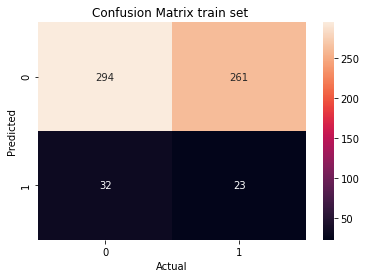

In [364]:
sns.heatmap(confusion_matrix(log_train,Y2_train),annot=True,fmt='g')
plt.title('Confusion Matrix train set ')
plt.xlabel('Actual')
plt.ylabel('Predicted')

Text(33.0, 0.5, 'Predicted')

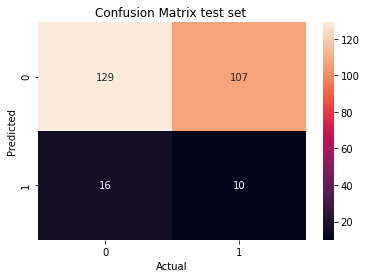

In [365]:
sns.heatmap(confusion_matrix(log_pred,Y2_test),annot=True,fmt='g')
plt.title('Confusion Matrix test set ')
plt.xlabel('Actual')
plt.ylabel('Predicted')

The AUC score of the train data is 0.567


Text(0.5, 1.0, 'ROC curve train data')

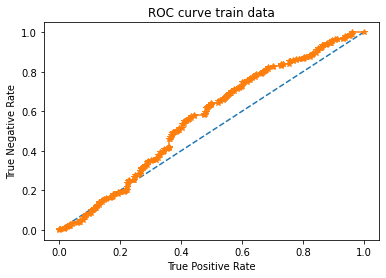

In [366]:
probs=model.predict_proba(X2_train)
probs=probs[:,-1]
AUC=roc_auc_score(Y2_train,probs)
print('The AUC score of the train data is {}'.format(round(AUC,3)))
log_tpr,log_fpr,thresholds=roc_curve(Y2_train,probs)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(log_tpr,log_fpr,marker='*')
plt.xlabel('True Positive Rate')
plt.ylabel('True Negative Rate')
plt.title('ROC curve train data')

The AUC score of the test data is 0.627


Text(0.5, 1.0, 'ROC curve test data')

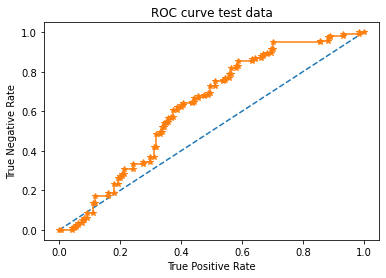

In [367]:
probs=model.predict_proba(X2_test)
probs=probs[:,-1]
AUC=roc_auc_score(Y2_test,probs)
print('The AUC score of the test data is {}'.format(round(AUC,3)))
log1_tpr,log1_fpr,thresholds=roc_curve(Y2_test,probs)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(log1_tpr,log1_fpr,marker='*')
plt.xlabel('True Positive Rate')
plt.ylabel('True Negative Rate')
plt.title('ROC curve test data')

In [368]:
print(classification_report(log_train,Y2_train))

              precision    recall  f1-score   support

           0       0.90      0.53      0.67       555
           1       0.08      0.42      0.14        55

    accuracy                           0.52       610
   macro avg       0.49      0.47      0.40       610
weighted avg       0.83      0.52      0.62       610



In [369]:
print(classification_report(log_pred,Y2_test))

              precision    recall  f1-score   support

           0       0.89      0.55      0.68       236
           1       0.09      0.38      0.14        26

    accuracy                           0.53       262
   macro avg       0.49      0.47      0.41       262
weighted avg       0.81      0.53      0.62       262



In [370]:
round(accuracy_score(lrmod_pred_train,Y2_train)*100,2)

68.03

In [371]:
round(accuracy_score(lrmodpred_test,Y2_test)*100,2)

64.5

Text(33.0, 0.5, 'Predicted')

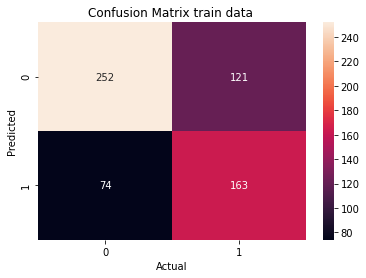

In [372]:
sns.heatmap(confusion_matrix(lrmod_pred_train,Y2_train),annot=True,fmt='g')
plt.title('Confusion Matrix train data ')
plt.xlabel('Actual')
plt.ylabel('Predicted')

Text(33.0, 0.5, 'Predicted')

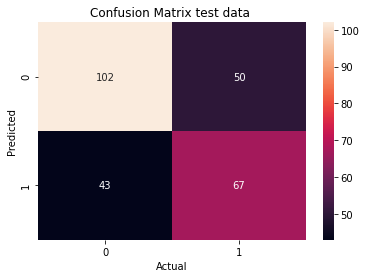

In [373]:
sns.heatmap(confusion_matrix(lrmodpred_test,Y2_test),annot=True,fmt='g')
plt.title('Confusion Matrix test data ')
plt.xlabel('Actual')
plt.ylabel('Predicted')

The AUC score of the train data is 0.74


Text(0.5, 1.0, 'ROC curve of train data')

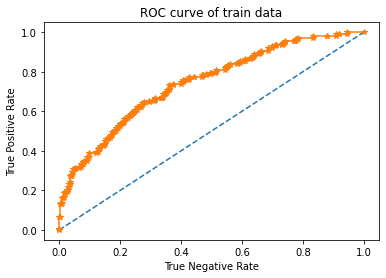

In [374]:
probs1=lr_bestgrid.predict_proba(X2_train)
probs1=probs1[:,-1]
AUC=roc_auc_score(Y2_train,probs1)
print('The AUC score of the train data is {}'.format(round(AUC,2)))
log_gstpr,log_gsfpr,thresholds=roc_curve(Y2_train,probs1)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(log_gstpr,log_gsfpr,marker='*')
plt.ylabel('True Positive Rate')
plt.xlabel('True Negative Rate')
plt.title('ROC curve of train data')

The AUC score of the test data is 0.7


Text(0.5, 1.0, 'ROC curve test data')

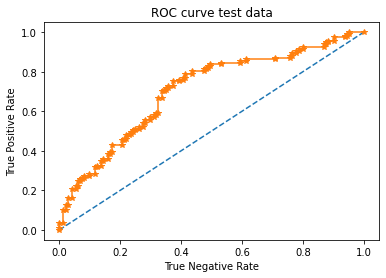

In [375]:
probs1=lr_bestgrid.predict_proba(X2_test)
probs1=probs1[:,-1]
AUC=roc_auc_score(Y2_test,probs1)
print('The AUC score of the test data is {}'.format(round(AUC,2)))
log_gs1tpr,log_gs1fpr,thresholds=roc_curve(Y2_test,probs1)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(log_gs1tpr,log_gs1fpr,marker='*')
plt.ylabel('True Positive Rate')
plt.xlabel('True Negative Rate')
plt.title('ROC curve test data')

In [376]:
print(classification_report(lrmod_pred_train,Y2_train))

              precision    recall  f1-score   support

           0       0.77      0.68      0.72       373
           1       0.57      0.69      0.63       237

    accuracy                           0.68       610
   macro avg       0.67      0.68      0.67       610
weighted avg       0.70      0.68      0.68       610



In [377]:
print(classification_report(lrmodpred_test,Y2_test))

              precision    recall  f1-score   support

           0       0.70      0.67      0.69       152
           1       0.57      0.61      0.59       110

    accuracy                           0.65       262
   macro avg       0.64      0.64      0.64       262
weighted avg       0.65      0.65      0.65       262



In [378]:
######## LDA

In [379]:
round(accuracy_score(lda_pred,Y2_test)*100,2)

64.12

In [380]:
round(accuracy_score(lda_train,Y2_train)*100,2)

67.21

Text(33.0, 0.5, 'Predicted')

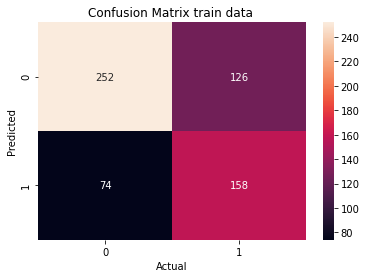

In [381]:
sns.heatmap(confusion_matrix(lda_train,Y2_train),annot=True,fmt='g')
plt.title('Confusion Matrix train data ')
plt.xlabel('Actual')
plt.ylabel('Predicted')

Text(33.0, 0.5, 'Predicted')

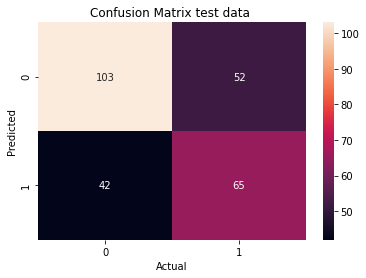

In [382]:
sns.heatmap(confusion_matrix(lda_pred,Y2_test),annot=True,fmt='g')
plt.title('Confusion Matrix test data ')
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [383]:
print(classification_report(lda_pred,Y2_test))

              precision    recall  f1-score   support

           0       0.71      0.66      0.69       155
           1       0.56      0.61      0.58       107

    accuracy                           0.64       262
   macro avg       0.63      0.64      0.63       262
weighted avg       0.65      0.64      0.64       262



In [384]:
print(classification_report(lda_train,Y2_train))

              precision    recall  f1-score   support

           0       0.77      0.67      0.72       378
           1       0.56      0.68      0.61       232

    accuracy                           0.67       610
   macro avg       0.66      0.67      0.66       610
weighted avg       0.69      0.67      0.68       610



The AUC score of the test data is 0.703


Text(0.5, 1.0, 'ROC Curve test')

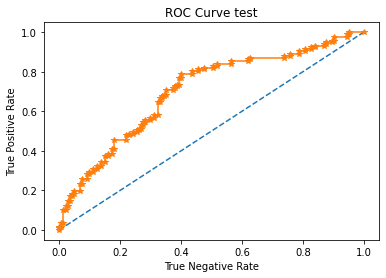

In [385]:
probs2=lda.predict_proba(X2_test)
probs2=probs2[:,-1]
AUC=roc_auc_score(Y2_test,probs2)
print('The AUC score of the test data is {}'.format(round(AUC,3)))
lda_1tpr,lda_1fpr,thresholds=roc_curve(Y2_test,probs2)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(lda_1tpr,lda_1fpr,marker='*')
plt.ylabel('True Positive Rate')
plt.xlabel('True Negative Rate')
plt.title('ROC Curve test')

The AUC score of the train data is 0.742


Text(0.5, 1.0, 'ROC Curve of test Data')

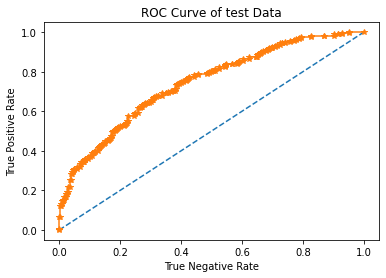

In [386]:
probs2=lda.predict_proba(X2_train)
probs2=probs2[:,-1]
AUC=roc_auc_score(Y2_train,probs2)
print('The AUC score of the train data is {}'.format(round(AUC,3)))
lda_tpr,lda_fpr,thresholds=roc_curve(Y2_train,probs2)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(lda_tpr,lda_fpr,marker='*')
plt.ylabel('True Positive Rate')
plt.xlabel('True Negative Rate')
plt.title('ROC Curve of test Data')

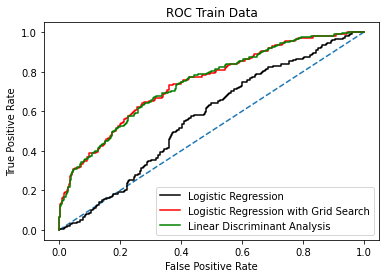

In [388]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(log_tpr,log_fpr, color='black', label="Logistic Regression")
plt.plot(log_gstpr, log_gsfpr, color='red', label="Logistic Regression with Grid Search")
plt.plot(lda_tpr, lda_fpr, color='green', label="Linear Discriminant Analysis")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Train Data')
plt.legend()

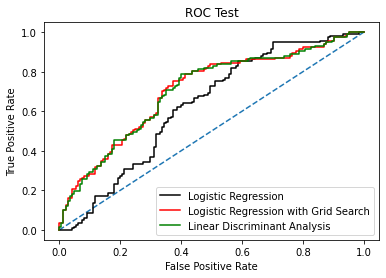

In [389]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(log1_tpr,log1_fpr, color='black', label="Logistic Regression")
plt.plot(log_gs1tpr, log_gs1fpr, color='red', label="Logistic Regression with Grid Search")
plt.plot(lda_1tpr, lda_1fpr, color='green', label="Linear Discriminant Analysis")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Test')
plt.legend()